In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv', na_values=u'\xa0')

In [150]:
cacao.head()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,NaN,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,NaN,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [151]:
import re

fixed_column_names = [re.sub(r'\s+', ' ', n, flags=re.UNICODE) for n in list(cacao.columns)]
cacao.columns = fixed_column_names
cacao.head()

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,NaN,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,NaN,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [152]:
cacao.describe()

,Bar id,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


In [153]:
# Задание 2.2.1
# Задание 2.2.2

cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company (Maker-if known)          1696 non-null   object 
 2   Specific Bean Origin or Bar Name  1737 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review Date                       1795 non-null   int64  
 5   Cocoa Percent                     1795 non-null   object 
 6   Company Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean Type                         907 non-null    object 
 9   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [154]:
cacao

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,NaN,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,NaN,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,NaN,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,NaN,India


1795


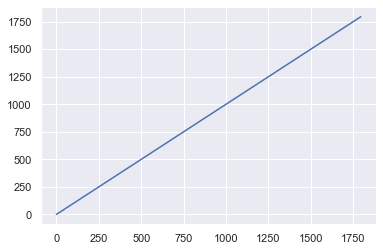

In [155]:
print(cacao['Bar id'].nunique())
plt.plot(cacao.index)

In [156]:
# вы 'Bar id' как индекс
cacao = cacao.set_index('Bar id')

In [157]:
# Задание 2.3.1 
print(cacao['Company (Maker-if known)'].nunique())

407


In [158]:
# Задание 2.3.2
print(cacao['Specific Bean Origin or Bar Name'].nunique())

1012


In [159]:
# Задание 2.3.3
(cacao['Specific Bean Origin or Bar Name'].value_counts() > 10).value_counts()
# количество 'True' значений

False    997
True      15
Name: Specific Bean Origin or Bar Name, dtype: int64

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: REF, dtype: float64

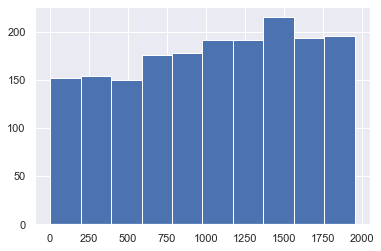

In [160]:
cacao['REF'].hist()
cacao['REF'].describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Review Date, dtype: float64

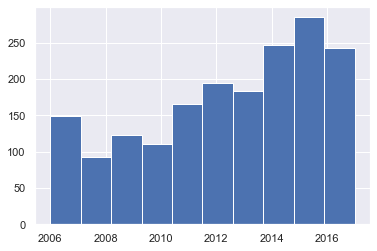

In [161]:
cacao['Review Date'].hist()
cacao['Review Date'].describe()

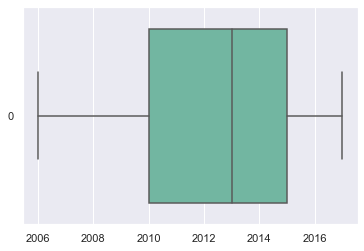

In [165]:
# Задание 2.3.4 
sns.set()
sns.boxplot(data=cacao['Review Date'].values, orient="h", palette="Set2")
# нет выбросов

In [166]:
cacao['Cocoa Percent'] = cacao['Cocoa Percent'].apply(lambda x: float(x.replace('%', '')))
cacao

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
Bar id,,,,,,,,,
1,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,NaN,Sao Tome
2,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
3,A. Morin,Atsane,1676,2015,670.0,France,3.00,NaN,Togo
4,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
5,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1791,Zotter,Peru,647,2011,70.0,Austria,3.75,NaN,Peru
1792,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India


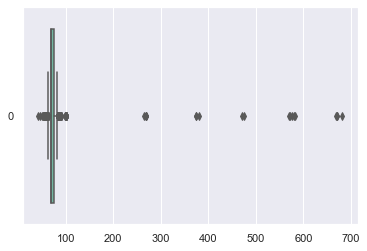

In [177]:
cacao['Cocoa Percent'].describe()

sns.set()
sns.boxplot(data=cacao['Cocoa Percent'].values, orient="h", palette="Set2")

In [180]:
cacao = cacao[cacao['Cocoa Percent'] <= 100.0]
cacao

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
Bar id,,,,,,,,,
1,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,NaN,Sao Tome
2,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
4,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
5,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru
6,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1791,Zotter,Peru,647,2011,70.0,Austria,3.75,NaN,Peru
1792,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
